In [ ]:
# O dataset Steam Games reúne dados sobre jogos disponíveis na Steam, incluindo informações como data de lançamento, avaliações dos jogadores, número de resenhas, gênero e outros aspectos. As avaliações dos jogos são divididas em categorias, como "Muy positivas", "Positiva", "Variadas" e "Negativa", entre outras. Cada categoria é transformada em valores numéricos, o que facilita a análise quantitativa das preferências dos usuários.

# Através dos gráficos criados, podemos responder a algumas perguntas e hipóteses interessantes sobre o comportamento dos jogadores e as tendências do mercado de games. Algumas questões que os gráficos ajudam a responder são:

# 1. Qual a média das avaliações por gênero?
# Com gráficos de barras, conseguimos comparar a média das avaliações entre os gêneros de jogos. Isso mostra, por exemplo, quais gêneros como "Ação", "RPG" ou "Estratégia" têm maior aceitação entre os jogadores, ajudando a entender os tipos de jogos mais apreciados pela comunidade.

# 2. Como as avaliações estão distribuídas entre os gêneros?
# Ao usar histogramas e FacetGrid, conseguimos ver como as avaliações se distribuem para cada gênero. Isso revela se as avaliações são mais divididas (com mais opiniões extremas, positivas ou negativas) ou mais equilibradas, sugerindo uma maior uniformidade entre os jogadores.

# 3. Como as avaliações mudam ao longo do tempo?
# Gráficos de linha ou área ajudam a observar a evolução das médias de avaliação ao longo dos anos. Isso pode mostrar se as avaliações têm melhorado ou piorado com o tempo, o que pode indicar uma mudança na qualidade dos jogos ou nas expectativas dos jogadores.

# 4. Algum gênero recebe consistentemente melhores ou piores avaliações?
# A comparação de gêneros ao longo do tempo pode mostrar quais gêneros têm avaliações mais positivas ou negativas de forma consistente. Isso pode indicar que alguns tipos de jogos estão sempre bem recebidos, enquanto outros têm dificuldades em agradar.

# 5. Como as avaliações variam dentro de cada gênero?
# A análise com FacetGrid ajuda a ver como as avaliações se distribuem dentro de cada gênero, mostrando se existe mais consenso ou mais divergência nas opiniões dos jogadores. Isso pode indicar, por exemplo, que alguns gêneros geram mais discussão entre os jogadores, enquanto outros são mais unânimes.

# 6. Quais jogos têm as melhores e as piores avaliações?
# Ao analisar as avaliações gerais, conseguimos identificar quais jogos têm as melhores ou piores avaliações. Isso ajuda a destacar os títulos que mais impactaram os jogadores, seja positivamente ou negativamente.

# Conclusão:
# Os gráficos gerados permitem uma visão mais clara das preferências dos jogadores e das tendências dos gêneros de jogos na Steam. Eles fornecem insights valiosos para entender como os jogos evoluem, quais tipos de jogos são mais populares e como os jogadores reagem aos diferentes lançamentos. Esses dados são úteis para desenvolvedores, analistas e para qualquer pessoa interessada em entender o comportamento dos consumidores de games na plataforma.

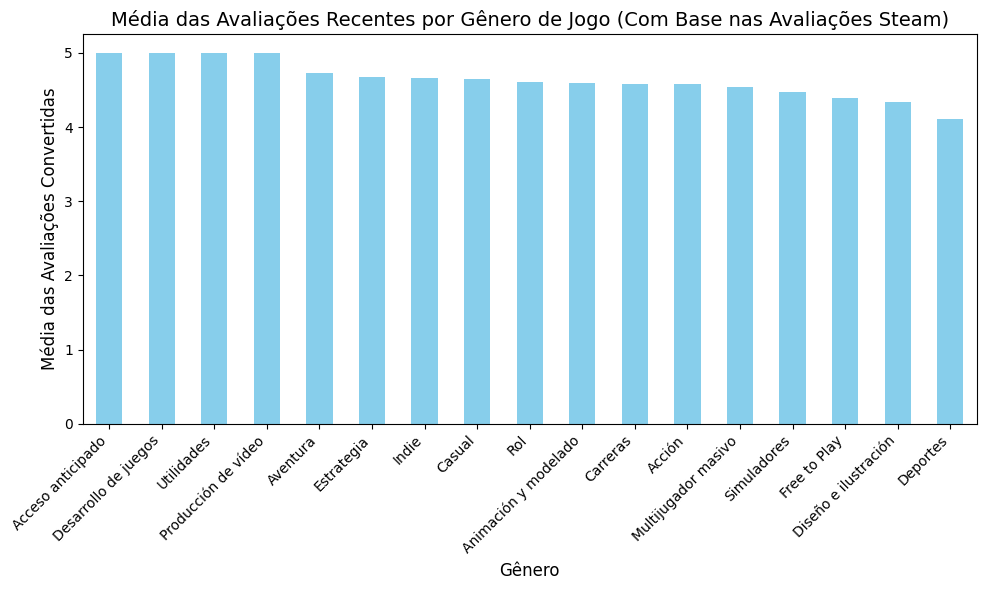

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar o dataset
df_games = pd.read_csv('./data/steam_games.csv')

# Verificar se as colunas relevantes existem e lidar com valores ausentes
df_games['recent_reviews'] = df_games['recent_reviews'].fillna('')  # Garantir que as avaliações ausentes sejam tratadas
df_games['genre'] = df_games['genre'].fillna('Unknown')  # Garantir que gêneros ausentes não causem problemas

# Mapeamento das avaliações para os valores numéricos
review_map = {
    'Muy positivas': 5,
    'Mayormente positivas': 4,
    'Positiva': 4,
    'Variadas': None,  # Não atribuir valor para "Variadas"
    'Negativa': 3,
    'Mayormente negativas': 2,
    'Muy negativas': 1,
    'Extremadamente negativas': 0
}

# Aplicar a conversão da avaliação para os valores numéricos
df_games['review_score'] = df_games['recent_reviews'].map(review_map)

# Remover linhas com avaliações "Variadas" (None) ou valores nulos
df_games = df_games.dropna(subset=['review_score'])

# Calcular a média das avaliações convertidas por gênero
genre_avg_reviews = df_games.groupby('genre')['review_score'].mean().sort_values(ascending=False)

# Criar gráfico de barras
plt.figure(figsize=(10, 6))
genre_avg_reviews.plot(kind='bar', color='skyblue')
plt.title('Média das Avaliações Recentes por Gênero de Jogo (Com Base nas Avaliações Steam)', fontsize=14)
plt.xlabel('Gênero', fontsize=12)
plt.ylabel('Média das Avaliações Convertidas', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Ajusta o layout para evitar sobreposição de texto
plt.show()


Valores ausentes na 'release_date': 11


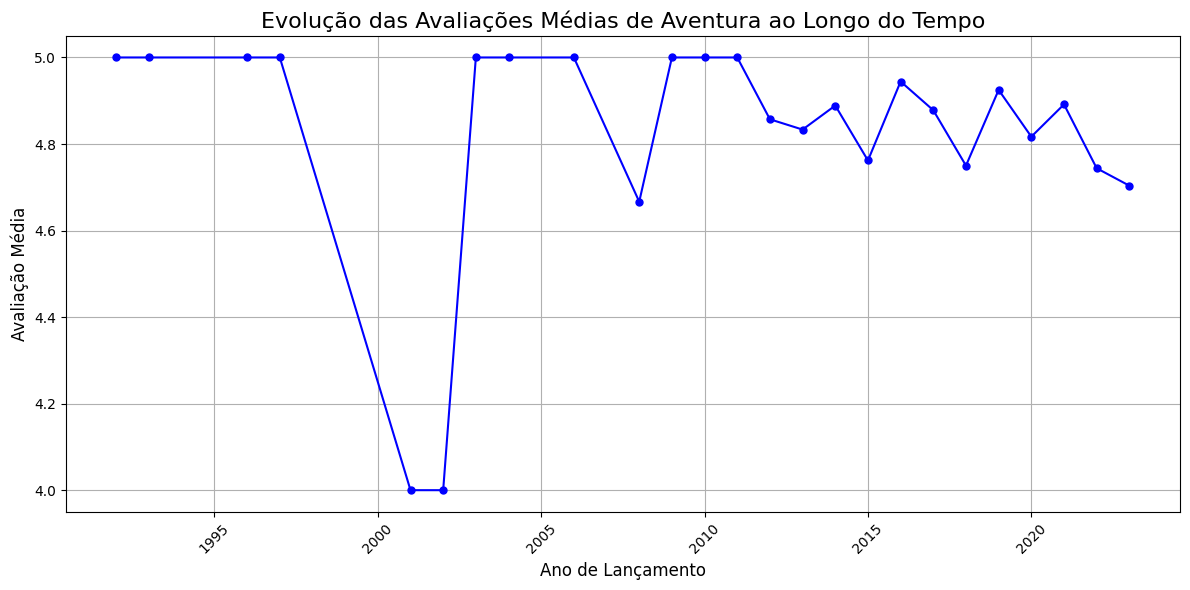

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

#Definir o gênero a ser verificado:
selected_genre = 'Aventura'

# Carregar o dataset
df_games = pd.read_csv('./data/steam_games.csv')

# Verificar se houve problemas na conversão
print(f"Valores ausentes na 'release_date': {df_games['release_date'].isnull().sum()}")

# Mapeamento das avaliações para os valores numéricos
review_map = {
    'Muy positivas': 5,
    'Mayormente positivas': 4,
    'Positiva': 4,
    'Variadas': None,  # Não atribuir valor para "Variadas"
    'Negativa': 3,
    'Mayormente negativas': 2,
    'Muy negativas': 1,
    'Extremamente negativas': 0
}

# Converter as avaliações textuais para valores numéricos
df_games['review_score'] = df_games['recent_reviews'].map(review_map)

# Remover jogos com avaliações "Variadas" (None) ou valores nulos
df_games = df_games.dropna(subset=['review_score'])

# Corrigir o formato da data para DD-MM-YYYY
df_games['release_date'] = pd.to_datetime(df_games['release_date'], format='%d/%m/%Y', errors='coerce')

# Extrair apenas o ano da data de lançamento
df_games['release_year'] = df_games['release_date'].dt.year

# Remover jogos com datas inválidas ou sem avaliações
df_games = df_games.dropna(subset=['release_year', 'all_reviews', 'review_score'])

# Filtrar o dataframe pelo gênero escolhido
df_filtered = df_games[df_games['genre'] == selected_genre]

# Agrupar por ano de lançamento e calcular a média das avaliações
df_avg_reviews_by_year = df_filtered.groupby('release_year')['review_score'].mean()

# Criar o gráfico de linhas
plt.figure(figsize=(12, 6))
plt.plot(df_avg_reviews_by_year.index, df_avg_reviews_by_year.values, marker='o', linestyle='-', markersize=5, color='blue')

# Títulos e rótulos
plt.title(f'Evolução das Avaliações Médias de {selected_genre} ao Longo do Tempo', fontsize=16)
plt.xlabel('Ano de Lançamento', fontsize=12)
plt.ylabel('Avaliação Média', fontsize=12)

# Adicionar grade (grid)
plt.grid(True)

# Ajustar os rótulos para melhor leitura
plt.xticks(rotation=45)
plt.tight_layout()  # Ajustar o layout para evitar sobreposição de texto

# Exibir o gráfico
plt.show()

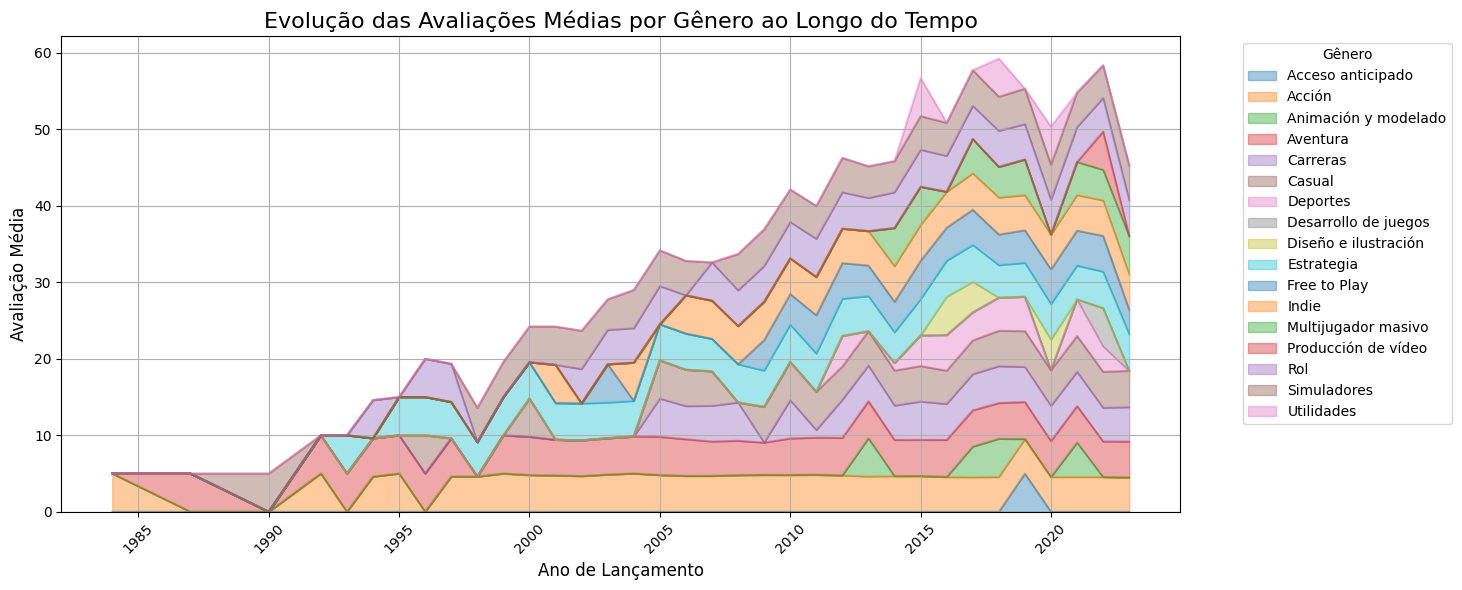

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar o dataset
df_games = pd.read_csv('./data/steam_games.csv')

# Verificar e tratar dados
df_games['release_date'] = pd.to_datetime(df_games['release_date'], format='%d/%m/%Y', errors='coerce')
df_games['review_score'] = df_games['recent_reviews'].map({
    'Muy positivas': 5,
    'Mayormente positivas': 4,
    'Positiva': 4,
    'Variadas': None,
    'Negativa': 3,
    'Mayormente negativas': 2,
    'Muy negativas': 1,
    'Extremadamente negativas': 0
})
df_games = df_games.dropna(subset=['review_score', 'release_date', 'genre'])

# Extrair o ano da data de lançamento
df_games['release_year'] = df_games['release_date'].dt.year

# Agrupar por ano de lançamento e gênero para calcular a média das avaliações
df_avg_reviews_by_genre = df_games.groupby(['release_year', 'genre'])['review_score'].mean().unstack()

# Criar o gráfico de áreas
plt.figure(figsize=(12, 6))
df_avg_reviews_by_genre.plot(kind='area', alpha=0.4, ax=plt.gca())

# Títulos e rótulos
plt.title('Evolução das Avaliações Médias por Gênero ao Longo do Tempo', fontsize=16)
plt.xlabel('Ano de Lançamento', fontsize=12)
plt.ylabel('Avaliação Média', fontsize=12)

# Adicionar grid
plt.grid(True)

# Ajustar os rótulos para melhor leitura
plt.xticks(rotation=45)
plt.tight_layout()

# Exibir o gráfico
plt.legend(title='Gênero', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


C:\Users\Pichau\AppData\Local\Temp\ipykernel_21760\126552135.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='genre', y='review_score', data=df_avg_reviews_by_genre, palette='Set2')


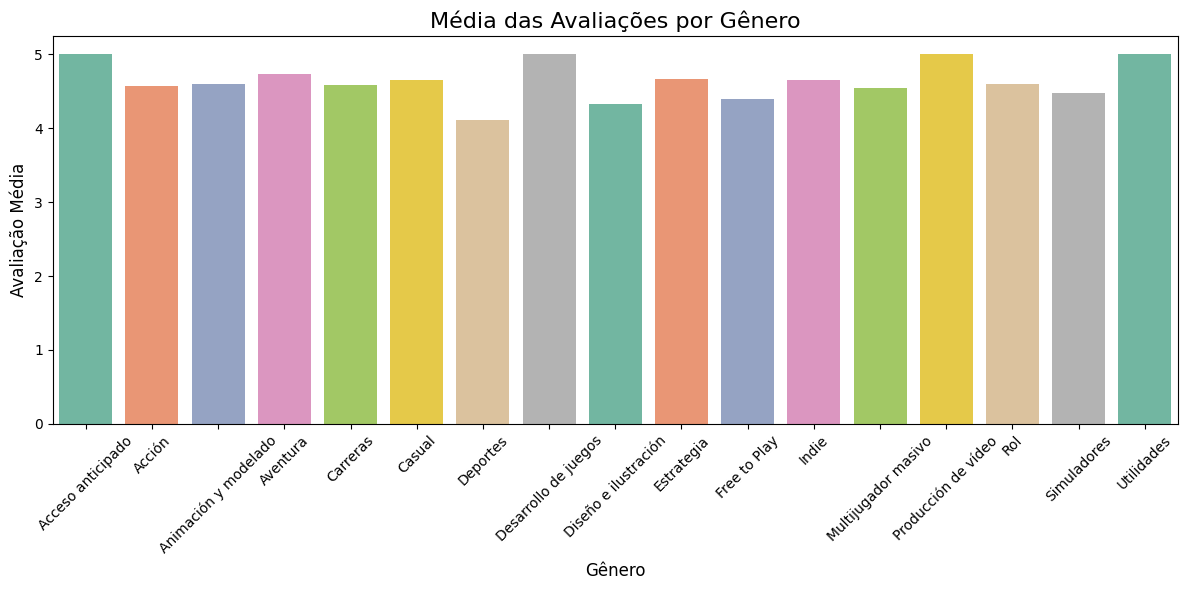

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar o dataset
df_games = pd.read_csv('./data/steam_games.csv')

# Mapeamento das avaliações para os valores numéricos
review_map = {
    'Muy positivas': 5,
    'Mayormente positivas': 4,
    'Positiva': 4,
    'Variadas': None,  # Não atribuir valor para "Variadas"
    'Negativa': 3,
    'Mayormente negativas': 2,
    'Muy negativas': 1,
    'Extremadamente negativas': 0
}

# Converter as avaliações textuais para valores numéricos
df_games['review_score'] = df_games['recent_reviews'].map(review_map)

# Remover jogos com avaliações "Variadas" (None) ou valores nulos
df_games = df_games.dropna(subset=['review_score'])

# Agrupar por gênero e calcular a média das avaliações
df_avg_reviews_by_genre = df_games.groupby('genre')['review_score'].mean().reset_index()

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='genre', y='review_score', data=df_avg_reviews_by_genre, palette='Set2')

# Títulos e rótulos
plt.title('Média das Avaliações por Gênero', fontsize=16)
plt.xlabel('Gênero', fontsize=12)
plt.ylabel('Avaliação Média', fontsize=12)

# Ajustar os rótulos para melhor leitura
plt.xticks(rotation=45)
plt.tight_layout()

# Exibir o gráfico
plt.show()


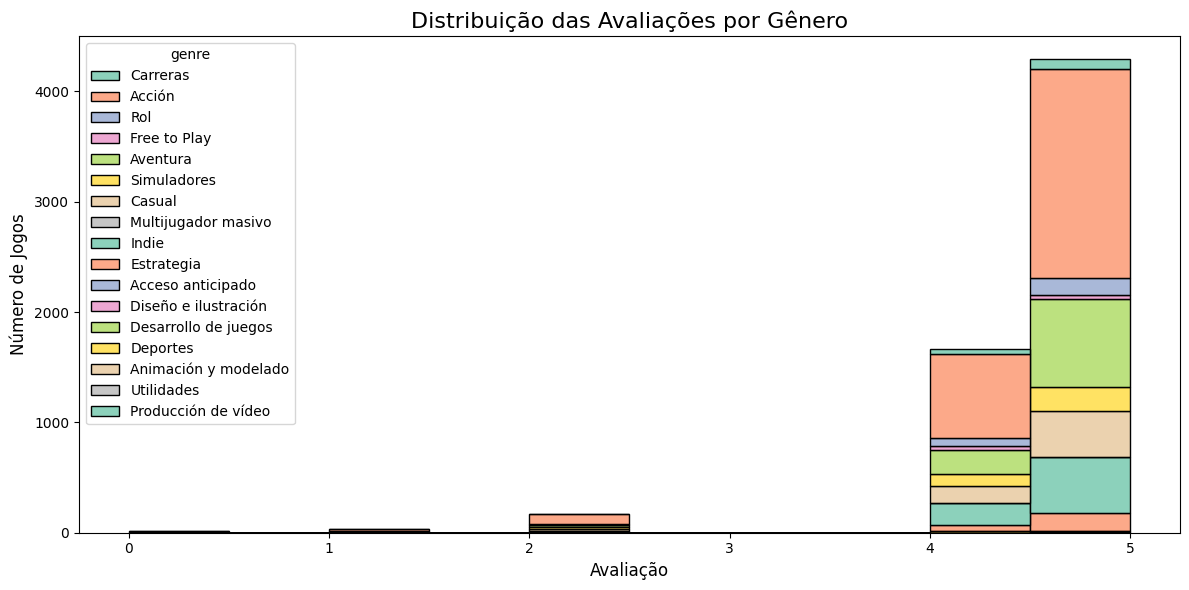

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar o dataset
df_games = pd.read_csv('./data/steam_games.csv')

# Mapeamento das avaliações para os valores numéricos
review_map = {
    'Muy positivas': 5,
    'Mayormente positivas': 4,
    'Positiva': 4,
    'Variadas': None,  # Não atribuir valor para "Variadas"
    'Negativa': 3,
    'Mayormente negativas': 2,
    'Muy negativas': 1,
    'Extremadamente negativas': 0
}

# Converter as avaliações textuais para valores numéricos
df_games['review_score'] = df_games['recent_reviews'].map(review_map)

# Remover jogos com avaliações "Variadas" (None) ou valores nulos
df_games = df_games.dropna(subset=['review_score'])

# Criar o gráfico de histograma
plt.figure(figsize=(12, 6))
sns.histplot(data=df_games, x='review_score', hue='genre', multiple="stack", palette='Set2', bins=10)

# Títulos e rótulos
plt.title('Distribuição das Avaliações por Gênero', fontsize=16)
plt.xlabel('Avaliação', fontsize=12)
plt.ylabel('Número de Jogos', fontsize=12)

# Ajustar os rótulos para melhor leitura
plt.tight_layout()

# Exibir o gráfico
plt.show()


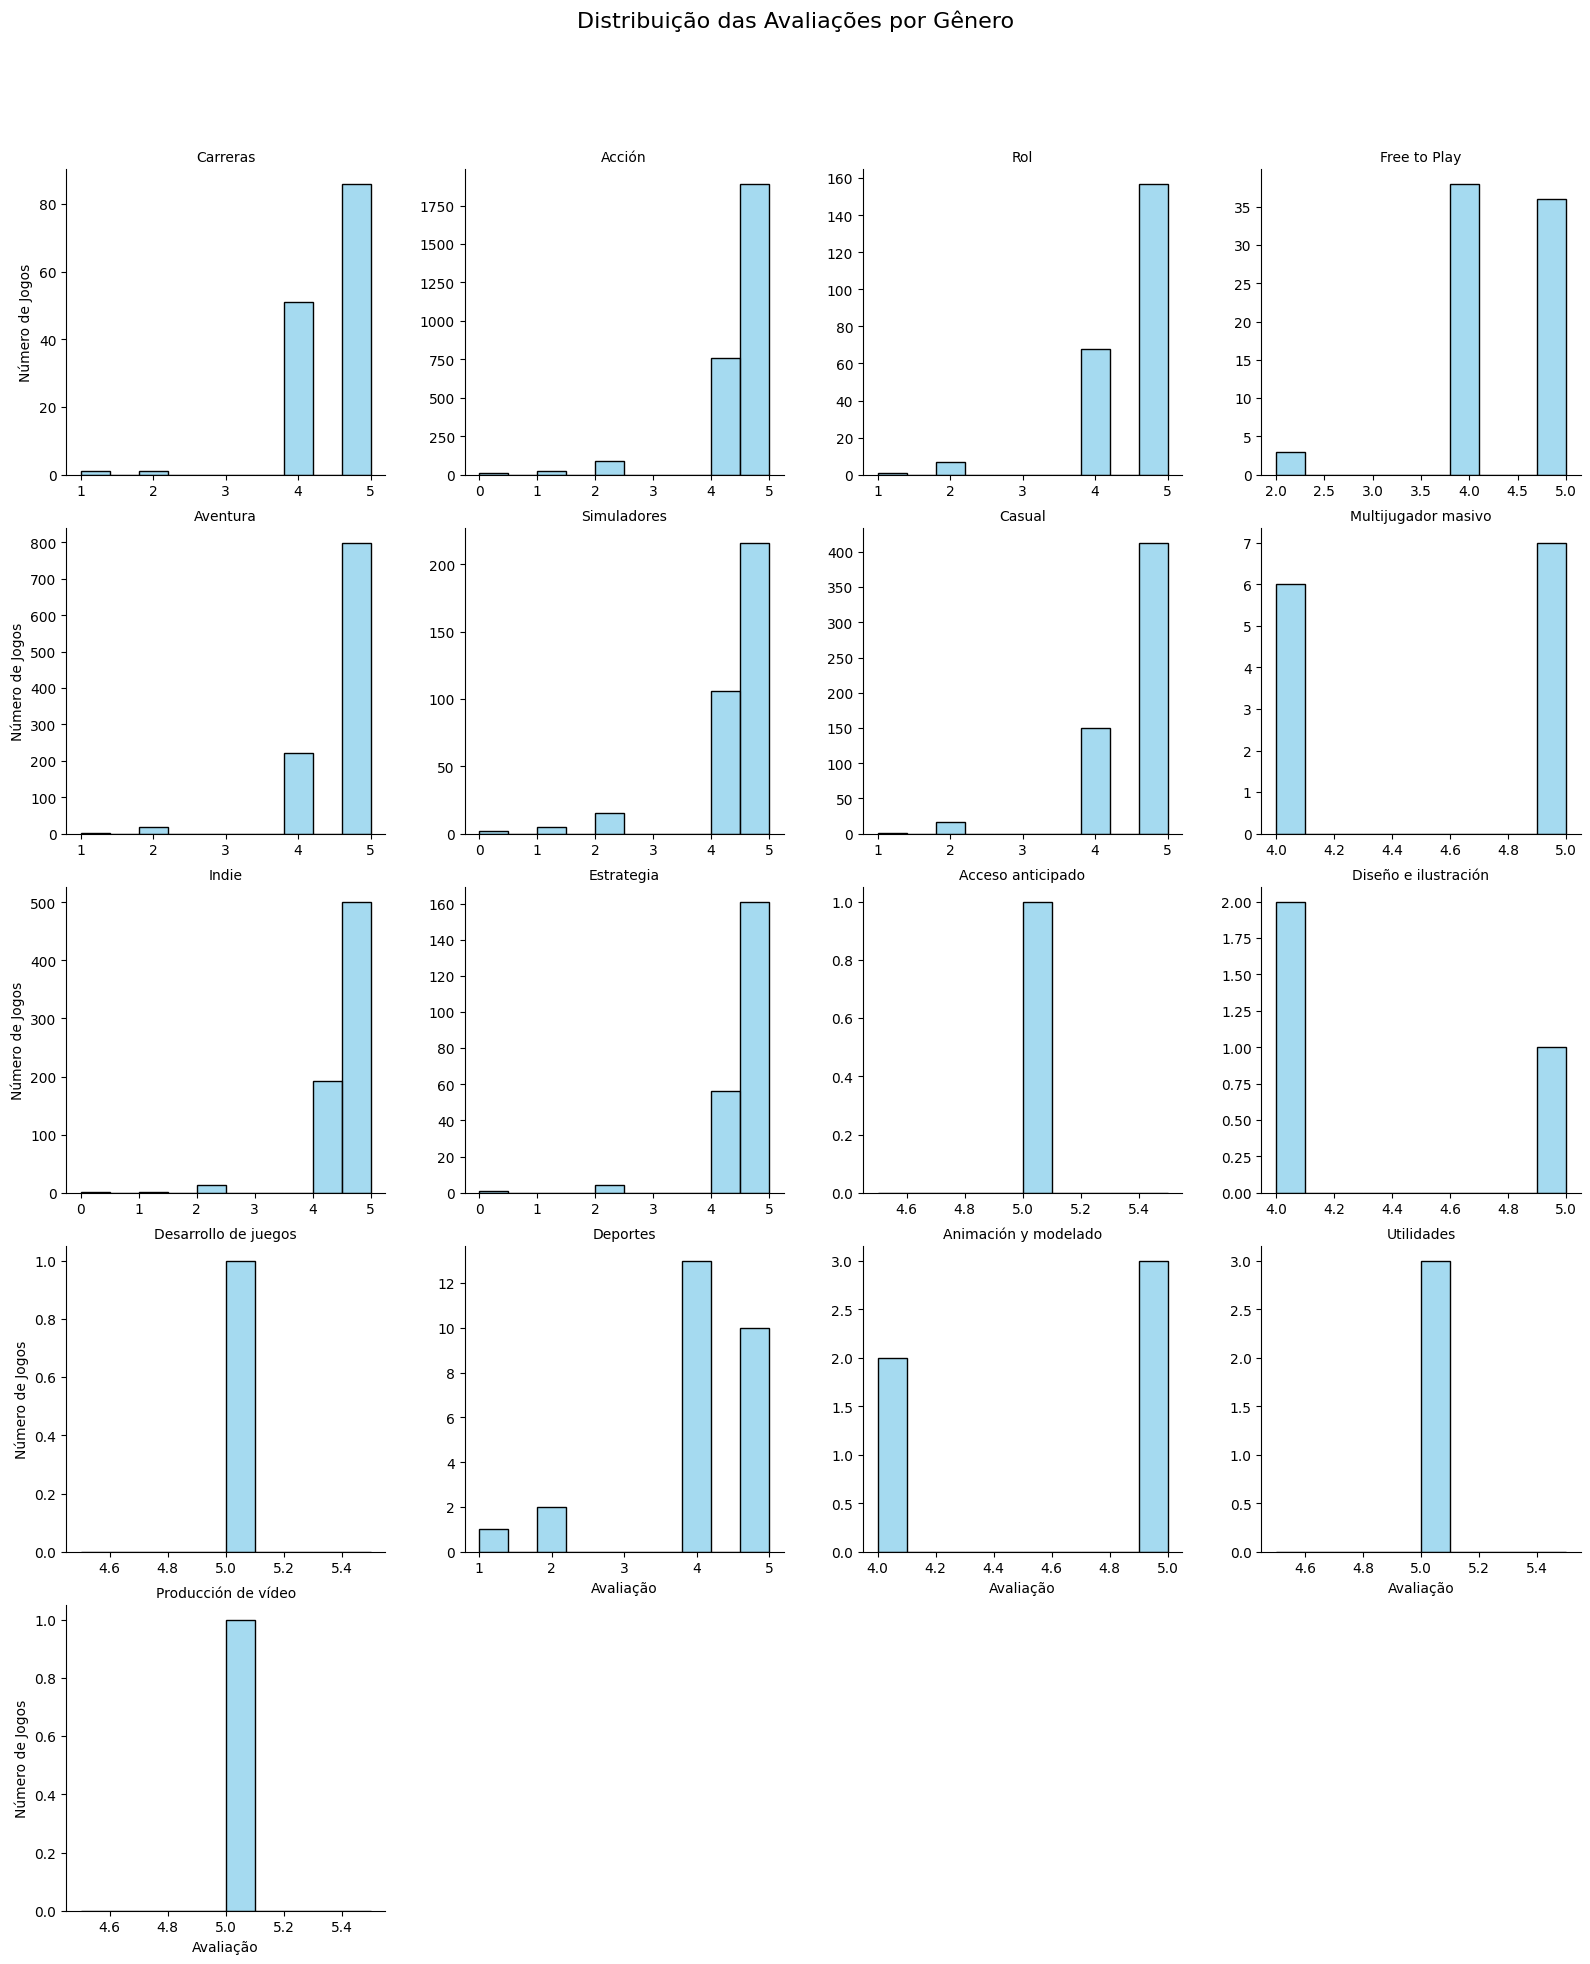

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar o dataset
df_games = pd.read_csv('./data/steam_games.csv')

# Mapeamento das avaliações para os valores numéricos
review_map = {
    'Muy positivas': 5,
    'Mayormente positivas': 4,
    'Positiva': 4,
    'Variadas': None,  # Não atribuir valor para "Variadas"
    'Negativa': 3,
    'Mayormente negativas': 2,
    'Muy negativas': 1,
    'Extremadamente negativas': 0
}

# Converter as avaliações textuais para valores numéricos
df_games['review_score'] = df_games['recent_reviews'].map(review_map)

# Remover jogos com avaliações "Variadas" (None) ou valores nulos
df_games = df_games.dropna(subset=['review_score'])

# Criar o FacetGrid com base no gênero
g = sns.FacetGrid(df_games, col='genre', col_wrap=4, height=4, sharex=False, sharey=False)

# Adicionar o histograma a cada faceta
g.map(sns.histplot, 'review_score', kde=False, bins=10, color='skyblue')

# Ajustar os títulos e rótulos
g.set_axis_labels('Avaliação', 'Número de Jogos')
g.set_titles('{col_name}')

# Ajustar os rótulos para melhor leitura
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Distribuição das Avaliações por Gênero', fontsize=16)

# Exibir o gráfico
plt.show()